#Importing modules


Pandas – This library helps to load the data frame in a 2D array format.


Numpy – Numpy arrays are very fast and can perform large computations.


Matplotlib – This library is used to draw visualizations.


Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.


OpenCV – This library focuses on image processing and handling.


Tensorflow – It has a range of functions to achieve complex functionalities with single lines of code.

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os


#**Importing Dataset and Preprocessing**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/flowers.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [4]:
base_dir = 'flowers'

img_size = 224
batch = 64


#**Image Data Generator**

In [5]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


#**Model Development **


From here we will use the we creating CNN model with the help of tensorflow library as it contains all the functionalities that one may need to define the architecture of a Convolutional Neural Network and train it on the data.

In [6]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
				activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
				padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))


#**Summary of the model**


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

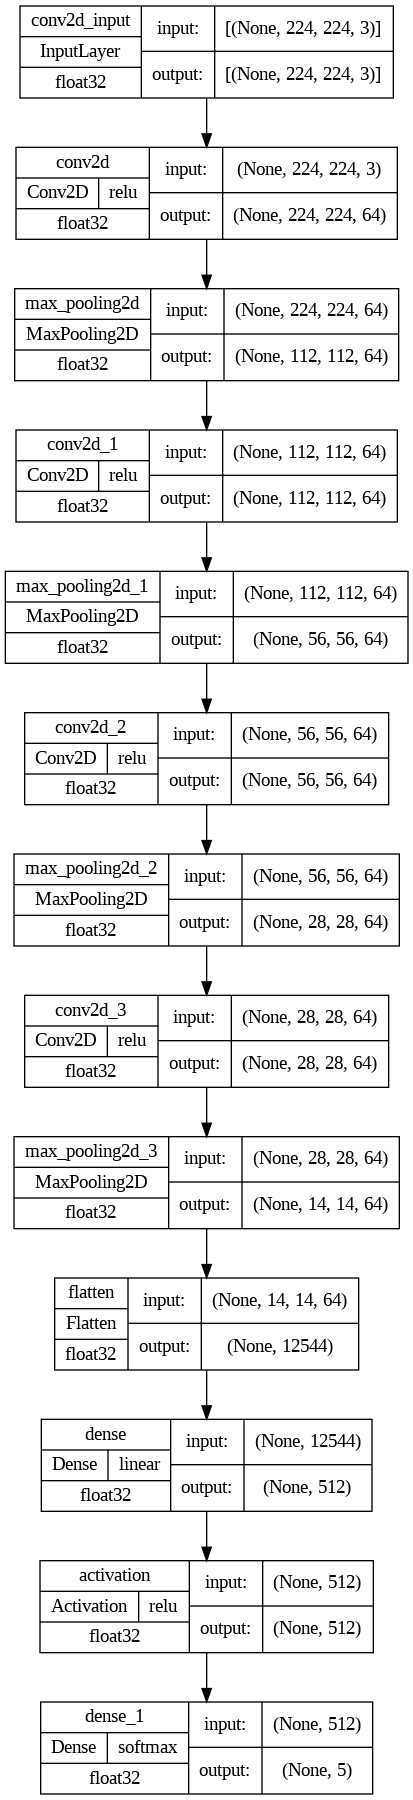

In [8]:
import tensorflow as tf
from tensorflow import keras
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


#**Compiling**

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
			loss='categorical_crossentropy', metrics=['accuracy'])


#**Fitting**

In [10]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)


Epoch 1/30
55/55 [==============================] - 438s 8s/step - loss: 1.5115 - accuracy: 0.3500 - val_loss: 1.4360 - val_accuracy: 0.3860
Epoch 2/30
55/55 [==============================] - 433s 8s/step - loss: 1.2453 - accuracy: 0.4614 - val_loss: 1.0970 - val_accuracy: 0.5558
Epoch 3/30
55/55 [==============================] - 426s 8s/step - loss: 1.0712 - accuracy: 0.5762 - val_loss: 1.0252 - val_accuracy: 0.6047
Epoch 4/30
55/55 [==============================] - 432s 8s/step - loss: 0.9558 - accuracy: 0.6283 - val_loss: 0.9398 - val_accuracy: 0.6291
Epoch 5/30
55/55 [==============================] - 429s 8s/step - loss: 0.8869 - accuracy: 0.6613 - val_loss: 0.9230 - val_accuracy: 0.6523
Epoch 6/30
55/55 [==============================] - 420s 8s/step - loss: 0.8520 - accuracy: 0.6682 - val_loss: 0.9078 - val_accuracy: 0.6488
Epoch 7/30
55/55 [==============================] - 431s 8s/step - loss: 0.7922 - accuracy: 0.6948 - val_loss: 0.9131 - val_accuracy: 0.6407
Epoch 8/30
55

NameError: ignored

#**Saving and Loading model**

In [12]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Once you saved the model, you can use it anytime without training again and again.

#**Model Evaluation and Prediction**


Evaluation includes the hyperparameter tuning if the model is not giving good results. You can also play with different parameters for better predictions

In [13]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 [==============================] - 0s 120ms/step
[[0. 0. 0. 1. 0.]]
sunflower


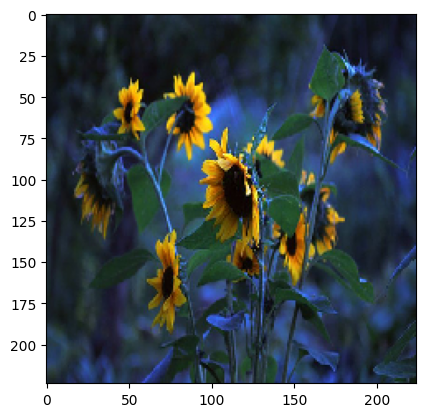

In [14]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('/content/drive/MyDrive/img.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
	  print(list_[i])
	  break


1/1 [==============================] - 0s 46ms/step
[[0. 0. 1. 0. 0.]]
Rose


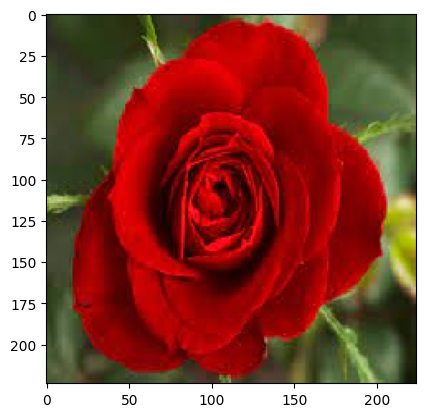

In [19]:
#Input image
test_image = image.load_img('/content/drive/MyDrive/download.jfif',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
	  print(list_[i])
	  break
